# **What is a Time Series?**

***What is time series?***
1.   A time series is a sequence of observations collected at a constant time intervals.
2.   The sequence of observations are made at a constant frequency, accordingly, they are termed as hourly, daily, weekly, monthly, quarterly or annual series. Although there are some time series wherein data is collected at a frequency of minutes and seconds, there are not considedred here.

***How is time series analysis different from regression analysis?***

1.   A time series analysis is time dependent (autocorrelation), which violates the primary assumption of a linear regression models that the observations are independent of each other.
2.   Additionally, a time series may have an increasing or decreasing trend, cyclic pattern, and seasonal pattern. For example, sale of jumpers is higher in winter months compred to the other months of a year.



# **What is time series forecasting?**
1. Forecasting involves predicting the future as accurately as possible, given all of the information available, including historical data and knowledge of any future events that might impact the forecast. For example, forecasting future electricity demand, forcasting future stock price, forecasting future sales, etc.
2. Some things are easier to forecast than others. For example, it is easier to predict the time of the sunrise tomorrow morning, whereas, tomorrow’s lotto numbers cannot be forecast with any accuracy.
3. Time series forecasting has tremendous commercial value because parameters that effect a business like demand and sales, number of visitors to a website, etc are eminable to forecasting.

***What is the difference between time series analysis and time series forecasting?***

1. Time series analysis is the preparatory step before you forecast into the future.
2. It involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts into the future.

***What factors influence future predictability?***

The predictability of a quantity depends on several factors including:
>1. how well we understand the factors that contribute to it;
2. how much data is available;
3. whether the forecasts can affect the thing we are trying to forecast.

*Examples:*
>1. Electricity deand can be accurately forecast as it satisfies all three requirements.
2. Forecasting stock pricess is very difficult as we do not understand all the factors affecting a stock's price.

# **Loading time series data into Pandas**

Time series data is typicall stored in a *csv* or *Excell* file. Pandas has builtin functions to read these files efficiently.

Let us use the read_csv() function in Pandas to read the time series dataset (a csv file of air passenger data) and store it in a pandas dataframe.

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from datetime import datetime

plt.style.use('ggplot')

In [2]:
#reading a csv file with default options
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv')
print ('Data Types: \n', df.dtypes)

Data Types: 
 date     object
value     int64
dtype: object


**parse_dates:** This option indicates the column(s) that must be treated as date-time column(s). In the above example, the column name is ‘date’ contains date-time information.

**date_parser:** If one want to parse customised date-time format, a function can be passed in this argument. This function must convert an input string into date-time object. An example parser function is provided in the above example. 

**index_col:** Manipulation of time-series data using Pandas Dataframe becomes easier if we set date-time object as the index column. This argument tells pandas to use the ‘date’ column as index.

In [3]:
#reading a csv file with  options specified
dt_parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date', date_parser=dt_parser)
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


We can notice that the dataframe has date-time object as index. The dtype=’datetime[ns]’  confirms that it is a date-time object. 

In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

In [5]:
#indexing techniques for TS data

#1. Index as a string constant:
print(df.loc['1949-01-01'])

#2. Using 'datetime' object as index:
dt = datetime(1949,1,1)
print(df.loc[dt])

#3. Specific date range. 
#Note unlike python indexing datetime indexing return last value also.
#The indices must be sorted for ranges to work. Shuffled indices will not work.
print(df.loc['1949-01-01':'1949-05-01'])

#4. Filtering values of a particular year
print(df.loc['1949'])

value    112
Name: 1949-01-01 00:00:00, dtype: int64
value    112
Name: 1949-01-01 00:00:00, dtype: int64
            value
date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
            value
date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118


**Difference between Time series and Panel data**

Panel data is also a time-series data.

Panel data contains one or more related variables (in addition to the original time series data), which were measured at the same time as the time series data.

For example, suppose we wish to forecast the hourly electricity demand (ED) of a hot region during the summer period. A model with predictor variables might be of the form

$$ED=f(\text{current temperature}, \text{strength of economy}, \text{population}, \text{time of day}, \text{day of week}, \text{error})$$

Typically, the columns in panel data contains predictor variables that can be helpful in predicting the independent variable, provided those columns will be available at the future forecasting period.

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv', parse_dates=['date'], index_col='date')
df = df[['Appliances', 'T1', 'RH_1', 'Visibility']]
df.head()

,Appliances,T1,RH_1,Visibility
date,,,,
2016-01-11 17:00:00,60,19.89,47.596667,63.000000
2016-01-11 17:10:00,60,19.89,46.693333,59.166667
2016-01-11 17:20:00,50,19.89,46.300000,55.333333
2016-01-11 17:30:00,50,19.89,46.066667,51.500000
2016-01-11 17:40:00,60,19.89,46.333333,47.666667


# **Visualisations used in the analysis of time series data**

Graphical analysis of time series data enables visualisation of many features within the data, including patterns, unusual observations, changes over time, and relationships between variables. The following graphs could be plotted as part of graphical analysis of time series data.

## **(i) Time series plots**

The first plot to make is time series plot itself. This will enable us to visualise missing data, highs and lows, seasonality, trend, etc.

In [7]:
from datetime import datetime, timedelta
import calendar

def my_parser(start):
  year = int(start)
  rem = start - year
  
  secondsOfYear = (366 if calendar.isleap(year) else 365) * 24 * 60 * 60*rem
  result = datetime(year, 1, 1) + timedelta(seconds=secondsOfYear)
  return result.date()

dt_parser = lambda x: my_parser(float(x))

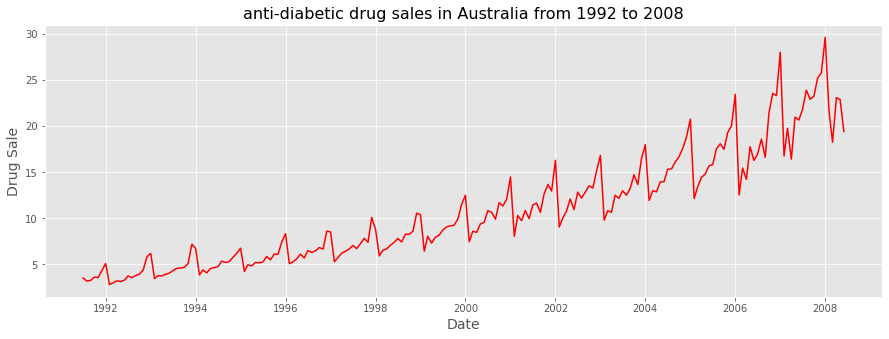

In [8]:
#Time series data taken from fpp2 package
dt_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
df_drug = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/a10.csv', parse_dates=['Date'], index_col='Date', date_parser=dt_parser)

plt.figure(figsize=(15,5))
plt.plot(df_drug.index, df_drug.value, color='r')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Drug Sale", fontsize=14)
plt.title("anti-diabetic drug sales in Australia from 1992 to 2008", fontsize=16);

The timeseries has a clear and increasing trend. It also has a strong seasonal pattern that increases in size as the level of the series increases.

All timeseries will not be like the above timeseries. For example, the below graph shows the weekly economy passenger load on Ansett Airlines between Australia’s two largest cities.

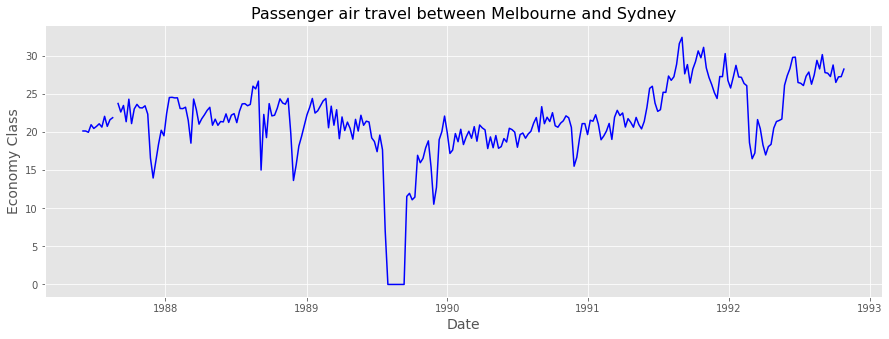

In [9]:
#Time series data taken from fpp2 package
dt_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
df = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/melsyd.csv', parse_dates=['Date'], index_col='Date', date_parser=dt_parser)
plt.figure(figsize=(15,5))
plt.plot(df.index, df.EconomyClass, color='b')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Economy Class", fontsize=14)
plt.title("Passenger air travel between Melbourne and Sydney", fontsize=16);

As can be observed:
1. There is missing data.
2. Horizontzl line represents the period (in 1989) when no passengers were flown due to an industrial dispute.
3. Reduced load in 1992 was due to a trial in which some economy class seats were replaced by business class seats.
4. There is a large increase in passenger numbers in the second half of 1991.
5. At the begining of every year there are some large dips in load due to holiday effects.
6. There is a long-term fluctuation in the level of the series which increases during 1987, decreases in 1989, and increases again through 1990 and 1991.


## **(ii) Seasonal plots**

To visualise seasonality of a time series, one can plot each year as a separate lineplot. This lets one to compare the year wise patterns side-by-side.

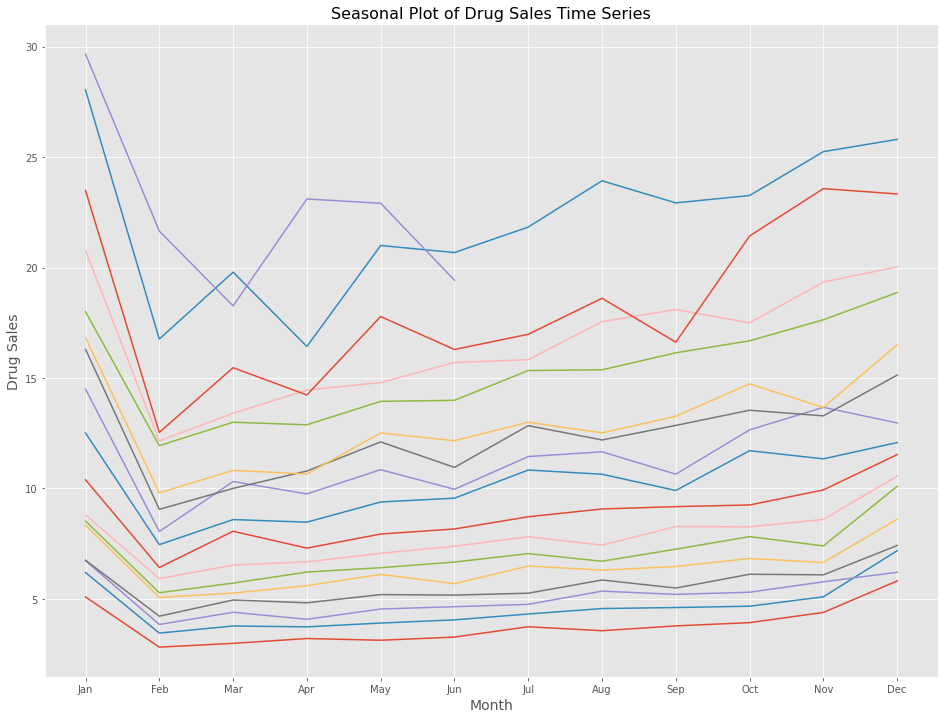

In [10]:
df = df_drug.reset_index()

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Draw Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], label=y)

# Decoration
plt.xlabel('Month', fontsize=14)
plt.ylabel('Drug Sales', fontsize=14)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=16)
plt.show()

As can be observed, every year the pattern repeats with a fall in passenger load immediately after new year. Also, year after year passenger numbers have increased indicating an upward trend.

## **(iii) Box plots**

Box plots could be used to visualise the existance of seasonal (monthly data) and trend (annual data) components.

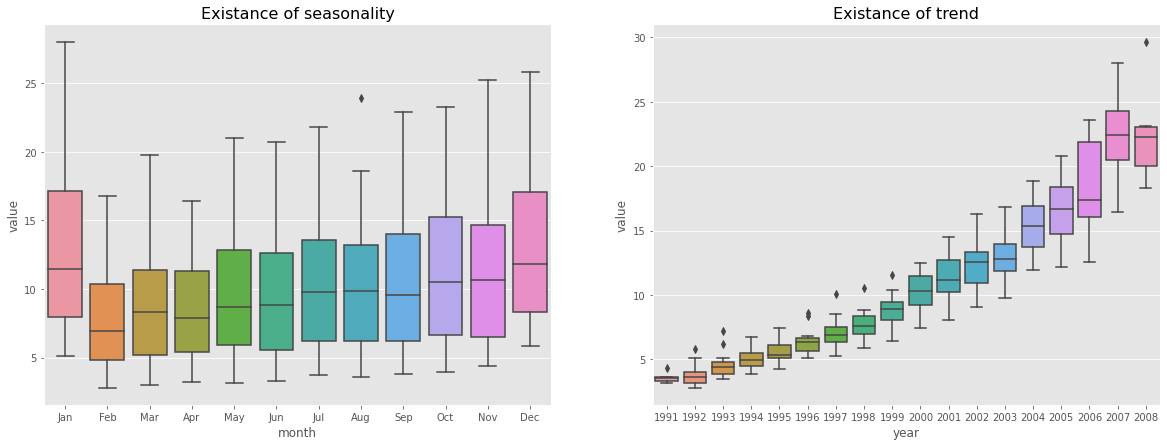

In [11]:
# Draw Plot
fig, ax = plt.subplots(1, 2, figsize=(20,7))
sn.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :], ax=ax[0])
sn.boxplot(x='year', y='value', data=df, ax=ax[1])

# Set Title
ax[0].set_title('Existance of seasonality', fontsize=16)
ax[1].set_title('Existance of trend', fontsize=16); 
plt.show();

>Within a year meadian value is fluctuating indicating seasonality. 

>Similarly, median value is increasing year after year indicating a trend in the data. 

## **(iv) Types of time series**

In [16]:
dt_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
df1 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/HSN1F.csv', parse_dates=['Date'], index_col='Date', date_parser=dt_parser)
df2 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/ustreas.csv', index_col='sno')
df3 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/qauselec.csv', parse_dates=['Date'], index_col='Date', date_parser=lambda x: my_parser(float(x)))
df3.head()

ValueError: ignored

## **(v) Components in a time series**

### **(a) Trend**


### **(b) Seasonality**


### **(c) Cyclicity**


### **(d) Error**